In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


C:\Users\dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16
EPOCHS = 20
NUM_CLASSES = 4  # Mild_Demented, Moderate_Demented, Non_Demented, Very_Mild_Demented


In [3]:
train_dir = r'G:\Major Project\MRI\Folder2\Alzheimer MRI Disease Classification Dataset\Preprocessed\train'
test_dir = r'G:\Major Project\MRI\Folder2\Alzheimer MRI Disease Classification Dataset\Preprocessed\test'

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    seed=42
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False
)


Found 5120 files belonging to 4 classes.
Found 1280 files belonging to 4 classes.


In [4]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # Output layer for 4 classes
])

model.summary()  # View the architecture

C:\Users\dell\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # Labels are integers
    metrics=['accuracy']
)

In [6]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,  # Use test data as validation for monitoring performance
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 127s 365ms/step - accuracy: 0.4439 - loss: 8.3587 - val_accuracy: 0.5680 - val_loss: 0.9194
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 94s 293ms/step - accuracy: 0.5484 - loss: 0.9529 - val_accuracy: 0.5672 - val_loss: 0.9002
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 91s 285ms/step - accuracy: 0.5821 - loss: 0.8817 - val_accuracy: 0.6141 - val_loss: 0.7944
Epoch 4/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 88s 274ms/step - accuracy: 0.6041 - loss: 0.8099 - val_accuracy: 0.6375 - val_loss: 0.7764
Epoch 5/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 87s 273ms/step - accuracy: 0.6523 - loss: 0.7501 - val_accuracy: 0.6625 - val_loss: 0.7304
Epoch 6/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 88s 273ms/step - accuracy: 0.6781 - loss: 0.6848 - val_accuracy: 0.6938 - val_loss: 0.7402
Epoch 7/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 88s 276ms/step - accuracy: 0.7005 - loss: 0.6436 - val_accuracy: 0.7289 - val_loss: 0.6259
Epoch 8/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 86s 270ms/step - accuracy: 0.7241 - loss: 

In [7]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")


80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.8193 - loss: 0.6731
Final Test Loss: 0.4888
Final Test Accuracy: 0.8445


In [8]:
model.save(r'G:\Major Project\MRI\Folder2\Alzheimer MRI Disease Classification Dataset\model.h5')


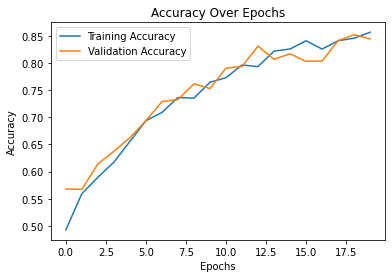

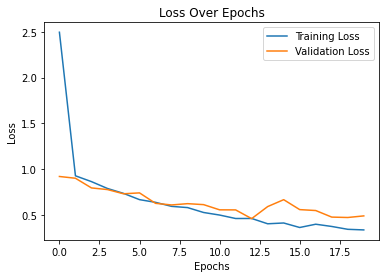

In [9]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [10]:
model.save(r'G:\Major Project\MRI\Folder2\Alzheimer MRI Disease Classification Dataset\model.keras')
